## Import Selenium

In [1]:
from selenium import webdriver
driver = webdriver.Chrome('C:/Soft/chromedriver.exe')

## Accesss a Website

In [2]:
driver.get('https://portal.vietcombank.com.vn/Personal/TG/Pages/ty-gia.aspx')

## Get Exchange Rate

In [3]:
textbox = driver.find_element_by_id('txttungay')

In [4]:
from selenium.webdriver.common.keys import Keys

In [7]:
textbox.clear()
textbox.send_keys("01/01/2020")
textbox.send_keys(Keys.TAB)

In [8]:
table = driver.find_element_by_id('ctl00_Content_ExrateView')

In [9]:
list_rows = table.find_elements_by_tag_name('tr')

In [14]:
for row in list_rows:
    list_tds = row.find_elements_by_tag_name('td')
    if len(list_tds) >= 5:
        if list_tds[1].text.strip() == 'AUD':
            print(list_tds[4].text)

16,390.86


## Get Exchange Rate With a Range

In [19]:
from datetime import date, timedelta
import time
list_rates = [] 
start_date = date(2020, 6, 1)
end_date = date(2020, 7, 31)
delta = timedelta(days=1)
while start_date <= end_date:
    date_string = start_date.strftime("%d/%m/%Y")
    
    textbox = driver.find_element_by_id('txttungay')
    textbox.clear()
    textbox.send_keys(date_string)
    textbox.send_keys(Keys.TAB)
    
    time.sleep(1)
    
    table = driver.find_element_by_id('ctl00_Content_ExrateView')
    list_rows = table.find_elements_by_tag_name('tr')
    for row in list_rows:
        list_tds = row.find_elements_by_tag_name('td')
        if len(list_tds) >= 5:
            if list_tds[1].text.strip() == 'AUD':
                list_rates.append(list_tds[4].text)
    start_date += delta

In [21]:
list_clean_rates = [rate.replace(',','') for rate in list_rates]

In [23]:
with open('exchange_rate.aud.csv', 'w') as fp:
    fp.write('rate\n')
    for rate in list_clean_rates:
        fp.write('{}\n'.format(rate))

## View Exchange Rate Data

In [25]:
import pandas as pd
df = pd.read_csv('exchange_rate.aud.csv')

In [26]:
df.head(5)

,rate
0,15883.81
1,16037.33
2,16384.53
3,16282.97
4,16530.95


In [37]:
rates = df['rate'].values[5:-15]

## Plot Exchange Rate

In [38]:
import matplotlib.pyplot as plt

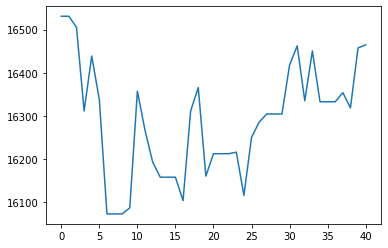

In [39]:
plt.plot(rates)

## Calculate Benefit

In [40]:
max_benefit = -100000
for i in range(rates.shape[0] - 1):
    price_buy = rates[i]
    for j in range(i+1, rates.shape[0]):
        price_sell = rates[j]
        benefit = price_sell - price_buy
        if benefit > max_benefit:
            max_benefit = benefit
print(max_benefit)

391.48999999999796


In [41]:
rates.max() - rates.min()

457.6800000000003

In [42]:
import numpy as np

In [45]:
(rates - np.minimum.accumulate(rates)).max()

391.48999999999796